In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Unsupervised Learning


Many instances of unsupervised learning, such as dimensionality reduction, manifold learning and feature extraction, find a new representation of the input data without any additional input.
The most simple example of this, which can barely be called learning, is rescaling the data to have zero mean and unit variance. This is a helpful preprocessing step for many machine learning models.

Applying such a preprocessing has a very similar interface to the supervised learning algorithms we saw so far.
Let's load the iris dataset and rescale it:

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target
print(X.shape)

(150, 4)


The iris dataset is not "centered" that is it has non-zero mean and the standard deviation is different for each component:


In [3]:
print("mean : %s " % X.mean(axis=0))
print("standard deviation : %s " % X.std(axis=0))

mean : [ 5.84333333  3.054       3.75866667  1.19866667] 
standard deviation : [ 0.82530129  0.43214658  1.75852918  0.76061262] 


To use a preprocessing method, we first import the estimator, here StandardScaler and instantiate it:
    

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

As with the classification and regression algorithms, we call ``fit`` to learn the model from the data. As this is an unsupervised model, we only pass ``X``, not ``y``. This simply estimates mean and standard deviation.

In [5]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

Now we can rescale our data by applying the ``transform`` (not ``predict``) method:

In [6]:
X_scaled = scaler.transform(X)

``X_scaled`` has the same number of samples and features, but the mean was subtracted and all features were scaled to have unit standard deviation:

In [7]:
print(X_scaled.shape)

(150, 4)


In [8]:
print("mean : %s " % X_scaled.mean(axis=0))
print("standard deviation : %s " % X_scaled.std(axis=0))

mean : [ -1.69031455e-15  -1.63702385e-15  -1.48251781e-15  -1.62314606e-15] 
standard deviation : [ 1.  1.  1.  1.] 


Principal Component Analysis
============================

An unsupervised transformation that is somewhat more interesting is Principle Component Analysis (PCA).
It is a technique to reduce the dimensionality of the data, by creating a linear projection.
That is, we find new features to represent the data that are a linear combination of the old data (i.e. we rotate it).

The way PCA finds these new directions is by looking for the directions of maximum variance.
Usually only few components that explain most of the variance in the data are kept. To illustrate how a rotation might look like, we first show it on two dimensional data and keep both principal components.

We create a Gaussian blob that is rotated:

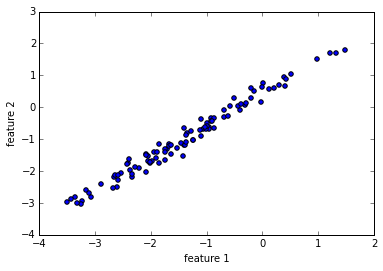

In [9]:
rnd = np.random.RandomState(42)
X_blob = np.dot(rnd.normal(size=(100, 2)), rnd.normal(size=(2, 2))) + rnd.normal(size=2)
plt.scatter(X_blob[:, 0], X_blob[:, 1])
plt.xlabel("feature 1")
plt.ylabel("feature 2")

As always, we instantiate our PCA model. By default all directions are kept.

In [10]:
from sklearn.decomposition import PCA
pca = PCA()

Then we fit the PCA model with our data. As PCA is an unsupervised algorithm, there is no output ``y``.

In [11]:
pca.fit(X_blob)

PCA(copy=True, n_components=None, whiten=False)

Then we can transform the data, projected on the principal components:

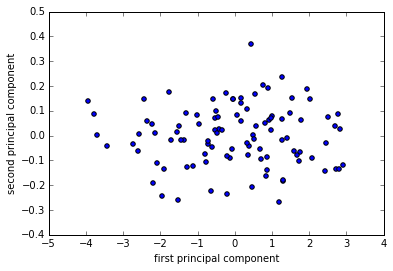

In [14]:
X_pca = pca.transform(X_blob)

plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel("first principal component")
plt.ylabel("second principal component")

On the left of the plot you can see the four points that were on the top right before. PCA found fit first component to be along the diagonal, and the second to be perpendicular to it. As PCA finds a rotation, the principal components are always at right angles to each other.

Dimensionality Reduction for Visualization with PCA
-------------------------------------------------------------
Consider the iris dataset. It cannot be visualized in a single 2D plot, as it has 4 features. We are going to extract 2 combinations of sepal and petal dimensions to visualize it.

First we load the iris dataset again.

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target
print(X.shape)

(150, 4)


This time, we set the number of components to ``2``:

In [21]:
pca = PCA(n_components=2)
pca.fit(X)


PCA(copy=True, n_components=2, whiten=False)

Then we project the data down to the first two principal components. The data has as many samples as before (as many flowers), but each is now represented by only two float numbers.

In [23]:
X_reduced = pca.transform(X)
print("Reduced dataset shape: %s" % (X_reduced.shape, ))

Reduced dataset shape: (150, 2)


We can now easily visualize the data in 2D:

Meaning of the 2 components:
0.362 x sepal length (cm) + -0.082 x sepal width (cm) + 0.857 x petal length (cm) + 0.359 x petal width (cm)
-0.657 x sepal length (cm) + -0.730 x sepal width (cm) + 0.176 x petal length (cm) + 0.075 x petal width (cm)


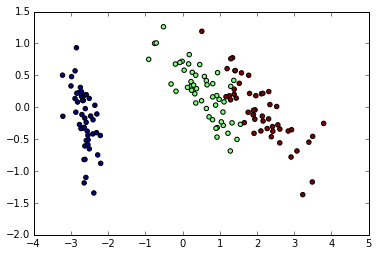

In [24]:


plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y)

print("Meaning of the 2 components:")
for component in pca.components_:
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component, iris.feature_names)))

#FIXME

Exercise?

### A recap on Scikit-learn's estimator interface

Scikit-learn strives to have a uniform interface across all methods,
and we’ll see examples of these below. Given a scikit-learn *estimator*
object named `model`, the following methods are available:

- Available in **all Estimators**
  + `model.fit()` : fit training data. For supervised learning applications,
    this accepts two arguments: the data `X` and the labels `y` (e.g. `model.fit(X, y)`).
    For unsupervised learning applications, this accepts only a single argument,
    the data `X` (e.g. `model.fit(X)`).
- Available in **supervised estimators**
  + `model.predict()` : given a trained model, predict the label of a new set of data.
    This method accepts one argument, the new data `X_new` (e.g. `model.predict(X_new)`),
    and returns the learned label for each object in the array.
  + `model.predict_proba()` : For classification problems, some estimators also provide
    this method, which returns the probability that a new observation has each categorical label.
    In this case, the label with the highest probability is returned by `model.predict()`.
  + `model.score()` : for classification or regression problems, most (all?) estimators implement
    a score method.  Scores are between 0 and 1, with a larger score indicating a better fit.
- Available in **unsupervised estimators**
  + `model.transform()` : given an unsupervised model, transform new data into the new basis.
    This also accepts one argument `X_new`, and returns the new representation of the data based
    on the unsupervised model.
  + `model.fit_transform()` : some estimators implement this method,
    which more efficiently performs a fit and a transform on the same input data.